In [1]:
from src.functions import *

In [2]:
class TFIM_2D(IsingModel):
    '''
    Represents a 2D Transverse Field Ising Model with a given number of qubits and shape
    and periodic boundary conditions.
    '''
    def __init__(self, shape, J_val, h_val=None):
        n = shape[0] * shape[1]
        if h_val is None:
            h = np.zeros(n)
        else:
            h = np.ones(n)*h_val
        # Helper function to map 2D coordinates to a 1D index
        def index(i, j):
            return i * shape[1] + j
        # Populate J with nearest-neighbor interactions
        J = np.zeros((n,n))
        for i in range(shape[0]):
            for j in range(shape[1]):
                current = index(i, j)
                # Right neighbor (wrap around horizontally)
                right = index(i, (j + 1) % shape[1])
                J[current, right] = J_val
                # Down neighbor (wrap around vertically)
                down = index((i + 1) % shape[0], j)
                J[current, down] = J_val
        np.fill_diagonal(J, 0) # Remove self-interaction
        J += J.T  # Ensures symmetry
        super().__init__(J, h)

In [3]:
J_val = 1
T = 0

In [4]:
gamma_range = np.linspace(0,1,20)
shapes = [(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),
          (2,2),(2,3),(2,4),(2,5),
          (3,2),(3,3)]

mag_arr = np.zeros((len(shapes), len(gamma_range)))
for shape_id, shape in tqdm(enumerate(shapes)):
    m = TFIM_2D(shape, J_val)
    H_tfim = np.diag(m.E_rescaled)
    for gamma_id, gamma in enumerate(gamma_range):
        H = (1-gamma)*H_tfim + gamma*H_mixer_list[m.n-1]
        mag = magnetization(H, T)
        mag_arr[shape_id, gamma_id] = mag

15it [00:36,  2.44s/it]


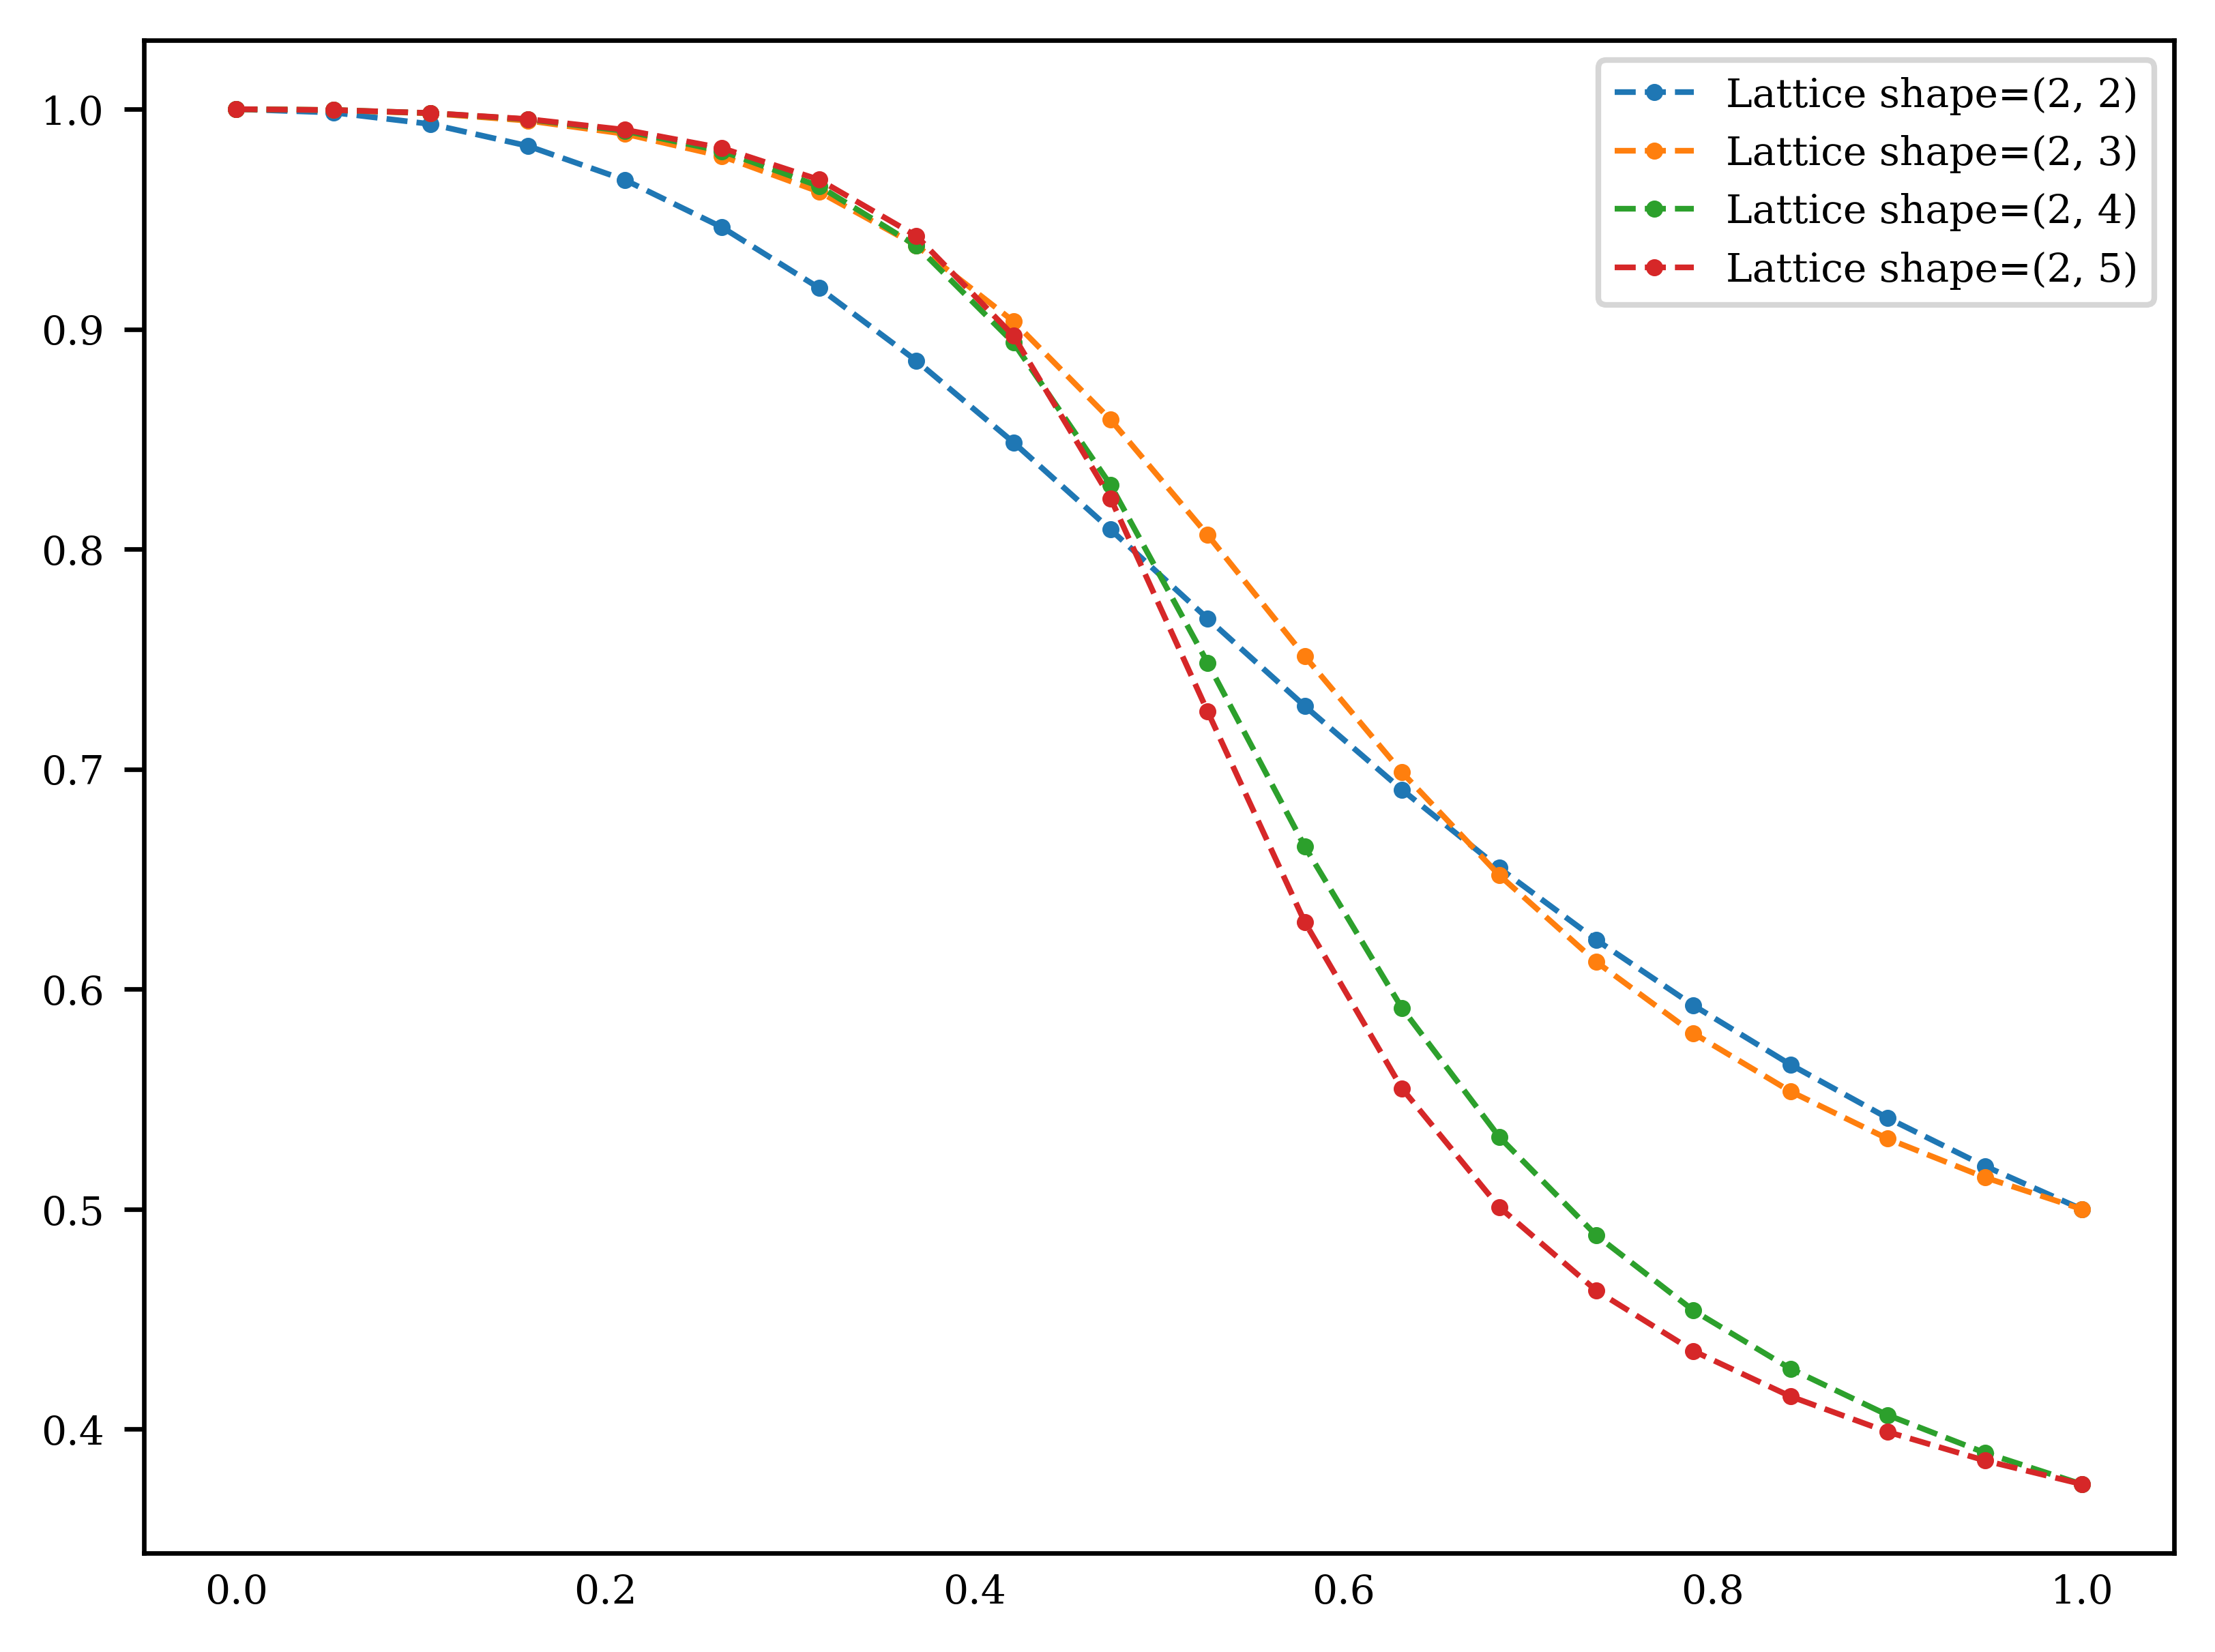

In [8]:
for shape_id, shape in enumerate(shapes[9:13]):
    plt.plot(gamma_range, mag_arr[shape_id], '.--', label=f'Lattice shape={shape}')
plt.legend()
plt.show()